In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import pandas as pd
from scipy.optimize import curve_fit
dirname = os.path.dirname("__file__")

# 6.2 Observing Rayleigh Fractionation

In [13]:
# Loading all data
#fileloc_rayleigh = "C:/Users/fexfl/Documents/GitHub/FP/F55/twvia_2023-01-08_f0000.txt"

fileloc_rayleigh = os.path.join(dirname, 'twvia_2023-01-08_f0000.txt')

# Loading time seperately as a string
time = np.loadtxt(fileloc_rayleigh, dtype = "str", skiprows = 7844, usecols = (0), delimiter = ",", unpack=True, max_rows = 221)
H2O_ppm, H2O_ppm_sd, O18_del, O18_del_sd, D_del, D_del_sd, O17_del, O17_del_sd=np.loadtxt(fileloc_rayleigh,skiprows = 7844, usecols = (1,2,3,4,5,6,7,8), delimiter = ",", unpack=True, max_rows = 221)

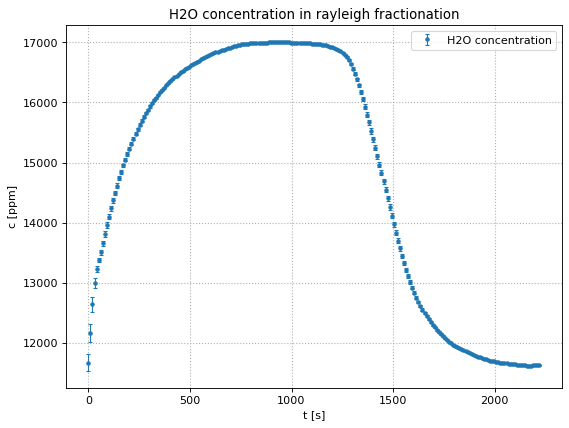

In [14]:
# Defining x axis by calculating delta_t from the beginning of the measurement
t_start = 42960 # seconds, corresponds to 11:56
t_end = 45180 # seconds, corresponds to 12:33
delta_t = t_end - t_start
x = np.linspace(0, delta_t, 221)

plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(x,H2O_ppm, yerr = H2O_ppm_sd, linestyle='None', marker = ".", label="H2O concentration", capsize = 2, elinewidth=1)
plt.xlabel('t [s]')
plt.ylabel('c [ppm]')
plt.title('H2O concentration in rayleigh fractionation')
#plt.yscale('log')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

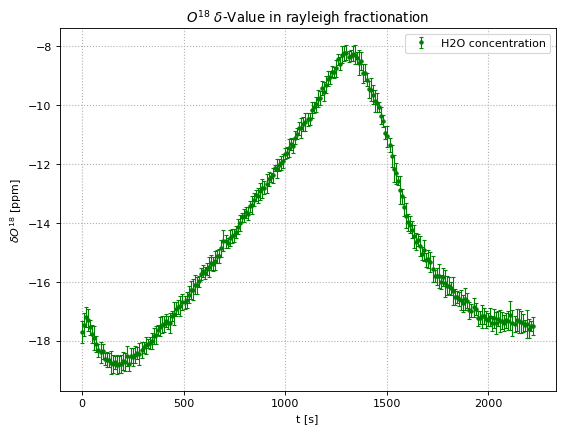

In [15]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(x,O18_del, yerr = O18_del_sd, linestyle='None', marker = ".", color = "green", label="H2O concentration", capsize = 2, elinewidth=1)
plt.xlabel('t [s]')
plt.ylabel('$\delta O^{18}$ [ppm]')
plt.title('$O^{18}$ $\delta$-Value in rayleigh fractionation')
#plt.yscale('log')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

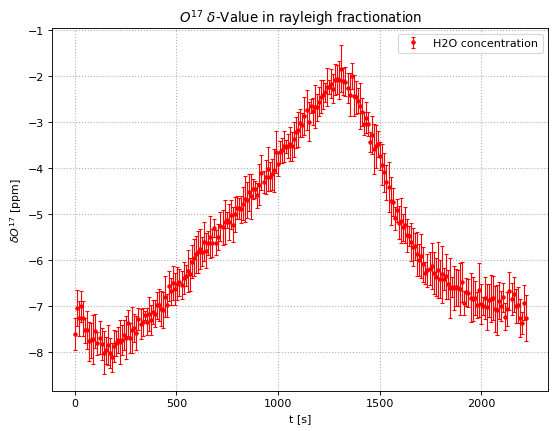

In [16]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(x,O17_del, yerr = O17_del_sd, linestyle='None', marker = ".", color = "red", label="H2O concentration", capsize = 2, elinewidth=1)
plt.xlabel('t [s]')
plt.ylabel('$\delta O^{17}$ [ppm]')
plt.title('$O^{17}$ $\delta$-Value in rayleigh fractionation')
#plt.yscale('log')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

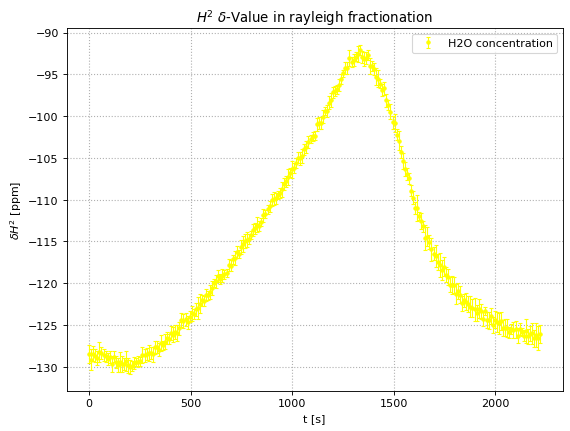

In [17]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(x,D_del, yerr = D_del_sd, linestyle='None', marker = ".", color = "yellow", label="H2O concentration", capsize = 2, elinewidth=1)
plt.xlabel('t [s]')
plt.ylabel('$\delta H^{2}$ [ppm]')
plt.title('$H^2$ $\delta$-Value in rayleigh fractionation')
#plt.yscale('log')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

# Data extraction for 6.1, 6.3 and 6.4

In [18]:
# Begin with extracting and analyzing the temperature and humidity data
fileloc_testo = os.path.join(dirname, 'Testo Data day 1 and half day 2.txt')

testo_id, testo_T, testo_relhum = np.loadtxt(fileloc_testo, skiprows = 1, usecols = (0, 4, 5), unpack=True, max_rows = 323)

In [19]:
# Calculate mean Temperature and mean relative Humidity
testo_T_mean = np.mean(testo_T)
testo_T_mean_sd = np.std(testo_T)

testo_relhum_mean = np.mean(testo_relhum)
testo_relhum_mean_sd = np.std(testo_relhum)

print("Mean Temperature: T = " , testo_T_mean , "+-" , testo_T_mean_sd , " [°C]")
print("Mean relative Humidity: h = " , testo_relhum_mean , "+-" , testo_relhum_mean_sd , " [%]")

Mean Temperature: T =  23.153560371517028 +- 0.7224901159998725  [°C]
Mean relative Humidity: h =  36.88606811145511 +- 1.7699480555089289  [%]


In [20]:
# Extract the water temperature, rainwater samples and unknown samples data from the text files
fileloc_w1 = os.path.join(dirname, 'tlwia2022-11-21_f0002-Processed.txt')

sample_name = np.loadtxt(fileloc_w1, skiprows=1, usecols=(0), dtype = "str", unpack=True, max_rows=70)
H2O, delta_2H, delta_2H_sd, delta_18O, delta_18O_sd, delta_17O, delta_17O_sd = np.loadtxt(fileloc_w1, skiprows=1, usecols=(1,2,3,4,5,6,7), unpack=True, max_rows=70)

fileloc_w2 = os.path.join(dirname, 'tlwia2022-11-22_f0001-Processed.txt')

sample_name_w2 = np.loadtxt(fileloc_w2, skiprows=1, usecols=(0), dtype = "str", unpack=True, max_rows=79)
H2O_w2, delta_2H_w2, delta_2H_sd_w2, delta_18O_w2, delta_18O_sd_w2, delta_17O_w2, delta_17O_sd_w2 = np.loadtxt(fileloc_w2, skiprows=1, usecols=(1,2,3,4,5,6,7), unpack=True, max_rows=79)
unknown_samples_list = np.array(["W017", "W070", "W071", "K001", "K007"])
rainwater_samples_list = np.array(["603", "641", "102", "105"])

In [21]:
# Now create arrays for the 40 and 50 degree water data
water_40_H2O_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
water_50_H2O_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
water_40_H2O = np.array([0,0,0,0,0,0,0], np.float64)
water_50_H2O = np.array([0,0,0,0,0,0,0], np.float64)
for i in range(sample_name.size):
    if ("40;" in sample_name[i]):
        sample_id = sample_name[i][3:]
        sample_id_int = int(sample_id) - 1
        # print("Sample ID:", sample_id_int + 1)
        if (math.isnan(H2O[i]) == False):
            water_40_H2O_2d[sample_id_int,0] += H2O[i]
            water_40_H2O_2d[sample_id_int,1] += float(1)
            #print("Adding H2O value of ", H2O[i])
            
    if ("50;" in sample_name[i]):
        sample_id = sample_name[i][3:]
        sample_id_int = int(sample_id) - 1
        print("Sample ID:", sample_id_int + 1)
        if (math.isnan(H2O[i]) == False):
            water_50_H2O_2d[sample_id_int,0] += H2O[i]
            water_50_H2O_2d[sample_id_int,1] += float(1)
            
for i in range(water_40_H2O.size):
    if (water_40_H2O_2d[i,1]!=0):
        water_40_H2O[i] = water_40_H2O_2d[i,0]/water_40_H2O_2d[i,1]
    else:
        water_40_H2O[i] = float("nan")
    if (water_50_H2O_2d[i,1]!=0):
        water_50_H2O[i] = water_50_H2O_2d[i,0]/water_50_H2O_2d[i,1]
    else:
        water_50_H2O[i] = float("nan")
print(water_40_H2O)
print(water_50_H2O)

Sample ID: 1
Sample ID: 2
Sample ID: 3
Sample ID: 4
Sample ID: 4
Sample ID: 5
Sample ID: 6
Sample ID: 7
Sample ID: 7
Sample ID: 6
Sample ID: 5
Sample ID: 4
Sample ID: 3
Sample ID: 2
Sample ID: 2
Sample ID: 1
[2.991402e+16 2.920270e+16 2.927615e+16 2.922762e+16 2.971881e+16
 2.935460e+16 2.947921e+16]
[2.9315335e+16 2.9176575e+16 2.9445270e+16 2.9247850e+16 2.9016170e+16
 2.9131000e+16 2.9283575e+16]


In [22]:
# Do the same for delta D values
water_40_delta_2H_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
water_50_delta_2H_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
water_40_delta_2H_sd_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
water_50_delta_2H_sd_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
water_40_delta_2H = np.array([0,0,0,0,0,0,0], np.float64)
water_50_delta_2H = np.array([0,0,0,0,0,0,0], np.float64)
water_40_delta_2H_sd = np.array([0,0,0,0,0,0,0], np.float64)
water_50_delta_2H_sd = np.array([0,0,0,0,0,0,0], np.float64)
for i in range(sample_name.size):
    if ("40;" in sample_name[i]):
        sample_id = sample_name[i][3:]
        sample_id_int = int(sample_id) - 1
        #print("Sample ID:", sample_id_int + 1)
        if ((math.isnan(delta_2H[i]) == False) and (math.isnan(delta_2H_sd[i]) == False)):
            water_40_delta_2H_2d[sample_id_int,0] += delta_2H[i]
            water_40_delta_2H_2d[sample_id_int,1] += float(1)
            
            water_40_delta_2H_sd_2d[sample_id_int,0] += delta_2H_sd[i]**2
            water_40_delta_2H_sd_2d[sample_id_int,1] += float(1)
            
    if ("50;" in sample_name[i]):
        sample_id = sample_name[i][3:]
        sample_id_int = int(sample_id) - 1
        if ((math.isnan(delta_2H[i]) == False) and (math.isnan(delta_2H_sd[i]) == False)):
            water_50_delta_2H_2d[sample_id_int,0] += delta_2H[i]
            water_50_delta_2H_2d[sample_id_int,1] += float(1)
            
            water_50_delta_2H_sd_2d[sample_id_int,0] += delta_2H_sd[i]**2
            water_50_delta_2H_sd_2d[sample_id_int,1] += float(1)
            
for i in range(water_40_delta_2H.size):
    if (water_40_delta_2H_2d[i,1]!=0):
        water_40_delta_2H[i] = water_40_delta_2H_2d[i,0]/water_40_delta_2H_2d[i,1]
    else:
        water_40_delta_2H[i] = float("nan")
    
    if (water_40_delta_2H_sd_2d[i,1]!=0):
        water_40_delta_2H_sd[i] = np.sqrt(water_40_delta_2H_sd_2d[i,0])/water_40_delta_2H_sd_2d[i,1]
    else:
        water_40_delta_2H_sd[i] = float("nan")
    
    if (water_50_delta_2H_2d[i,1]!=0):
        water_50_delta_2H[i] = water_50_delta_2H_2d[i,0]/water_50_delta_2H_2d[i,1]
    else:
        water_50_delta_2H[i] = float("nan")
        
    if (water_50_delta_2H_sd_2d[i,1]!=0):
        water_50_delta_2H_sd[i] = np.sqrt(water_50_delta_2H_sd_2d[i,0])/water_50_delta_2H_sd_2d[i,1]
    else:
        water_50_delta_2H_sd[i] = float("nan")

print(water_40_delta_2H)
print(water_40_delta_2H_sd)
print(water_50_delta_2H)
print(water_50_delta_2H_sd)

[-59.557547  -57.545005  -56.678436  -55.556478  -54.207502  -53.1291515
 -51.5028095]
[0.7929829  0.3874424  0.6098075  0.3140557  0.23587989 0.40872544
 0.34576367]
[-59.051559  -57.1658525 -54.634541  -51.7012825 -49.352494  -46.160142
 -42.982619 ]
[0.34728575 0.361381   0.6266324  0.3420542  0.5180777  0.1637768
 0.43992797]


In [23]:
# Do the same for delta 18O values
water_40_delta_18O_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
water_50_delta_18O_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
water_40_delta_18O_sd_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
water_50_delta_18O_sd_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
water_40_delta_18O = np.array([0,0,0,0,0,0,0], np.float64)
water_50_delta_18O = np.array([0,0,0,0,0,0,0], np.float64)
water_40_delta_18O_sd = np.array([0,0,0,0,0,0,0], np.float64)
water_50_delta_18O_sd = np.array([0,0,0,0,0,0,0], np.float64)
for i in range(sample_name.size):
    if ("40;" in sample_name[i]):
        sample_id = sample_name[i][3:]
        sample_id_int = int(sample_id) - 1
        #print("Sample ID:", sample_id_int + 1)
        if ((math.isnan(delta_18O[i]) == False) and (math.isnan(delta_18O_sd[i]) == False)):
            water_40_delta_18O_2d[sample_id_int,0] += delta_18O[i]
            water_40_delta_18O_2d[sample_id_int,1] += float(1)
            #print("Adding the following O18 value: ", delta_18O[i])
            
            water_40_delta_18O_sd_2d[sample_id_int,0] += delta_18O_sd[i]**2
            water_40_delta_18O_sd_2d[sample_id_int,1] += float(1)
            
    if ("50;" in sample_name[i]):
        sample_id = sample_name[i][3:]
        sample_id_int = int(sample_id) - 1
        if ((math.isnan(delta_18O[i]) == False) and (math.isnan(delta_18O_sd[i]) == False)):
            water_50_delta_18O_2d[sample_id_int,0] += delta_18O[i]
            water_50_delta_18O_2d[sample_id_int,1] += float(1)
            
            water_50_delta_18O_sd_2d[sample_id_int,0] += delta_18O_sd[i]**2
            water_50_delta_18O_sd_2d[sample_id_int,1] += float(1)
            
for i in range(water_40_delta_18O.size):
    if (water_40_delta_18O_2d[i,1]!=0):
        water_40_delta_18O[i] = water_40_delta_18O_2d[i,0]/water_40_delta_18O_2d[i,1]
    else:
        water_40_delta_18O[i] = float("nan")
    
    if (water_40_delta_18O_sd_2d[i,1]!=0):
        water_40_delta_18O_sd[i] = np.sqrt(water_40_delta_18O_sd_2d[i,0])/water_40_delta_18O_sd_2d[i,1]
    else:
        water_40_delta_18O_sd[i] = float("nan")
    
    if (water_50_delta_18O_2d[i,1]!=0):
        water_50_delta_18O[i] = water_50_delta_18O_2d[i,0]/water_50_delta_18O_2d[i,1]
    else:
        water_50_delta_18O[i] = float("nan")
        
    if (water_50_delta_18O_sd_2d[i,1]!=0):
        water_50_delta_18O_sd[i] = np.sqrt(water_50_delta_18O_sd_2d[i,0])/water_50_delta_18O_sd_2d[i,1]
    else:
        water_50_delta_18O_sd[i] = float("nan")

print(water_40_delta_18O)
print(water_40_delta_18O_sd)
print(water_50_delta_18O)
print(water_50_delta_18O_sd)

[-8.331498 -7.592628 -7.359676 -7.358254 -6.763276 -6.64033  -6.226453]
[0.1630297  0.1090298  0.09624214 0.0463301  0.02878096 0.07427974
 0.05249103]
[-8.260712  -7.6875415 -6.846214  -5.9202935 -5.069174  -4.105485
 -3.179445 ]
[0.00821171 0.07354588 0.0671811  0.04849823 0.07198428 0.03253514
 0.0539773 ]


In [24]:
# Do the same for delta 17O values
water_40_delta_17O_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
water_50_delta_17O_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
water_40_delta_17O_sd_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
water_50_delta_17O_sd_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
water_40_delta_17O = np.array([0,0,0,0,0,0,0], np.float64)
water_50_delta_17O = np.array([0,0,0,0,0,0,0], np.float64)
water_40_delta_17O_sd = np.array([0,0,0,0,0,0,0], np.float64)
water_50_delta_17O_sd = np.array([0,0,0,0,0,0,0], np.float64)
for i in range(sample_name.size):
    if ("40;" in sample_name[i]):
        sample_id = sample_name[i][3:]
        sample_id_int = int(sample_id) - 1
        #print("Sample ID:", sample_id_int + 1)
        if ((math.isnan(delta_17O[i]) == False) and (math.isnan(delta_17O_sd[i]) == False)):
            water_40_delta_17O_2d[sample_id_int,0] += delta_17O[i]
            water_40_delta_17O_2d[sample_id_int,1] += float(1)
            print("Adding the following O17 value: ", delta_17O[i])
            
            water_40_delta_17O_sd_2d[sample_id_int,0] += delta_17O_sd[i]**2
            water_40_delta_17O_sd_2d[sample_id_int,1] += float(1)
            
    if ("50;" in sample_name[i]):
        sample_id = sample_name[i][3:]
        sample_id_int = int(sample_id) - 1
        if ((math.isnan(delta_17O[i]) == False) and (math.isnan(delta_17O_sd[i]) == False)):
            water_50_delta_17O_2d[sample_id_int,0] += delta_17O[i]
            water_50_delta_17O_2d[sample_id_int,1] += float(1)
            
            water_50_delta_17O_sd_2d[sample_id_int,0] += delta_17O_sd[i]**2
            water_50_delta_17O_sd_2d[sample_id_int,1] += float(1)
            
for i in range(water_40_delta_17O.size):
    if (water_40_delta_17O_2d[i,1]!=0):
        water_40_delta_17O[i] = water_40_delta_17O_2d[i,0]/water_40_delta_17O_2d[i,1]
    else:
        water_40_delta_17O[i] = float("nan")
    
    if (water_40_delta_17O_sd_2d[i,1]!=0):
        water_40_delta_17O_sd[i] = np.sqrt(water_40_delta_17O_sd_2d[i,0])/water_40_delta_17O_sd_2d[i,1]
    else:
        water_40_delta_17O_sd[i] = float("nan")
    
    if (water_50_delta_17O_2d[i,1]!=0):
        water_50_delta_17O[i] = water_50_delta_17O_2d[i,0]/water_50_delta_17O_2d[i,1]
    else:
        water_50_delta_17O[i] = float("nan")
        
    if (water_50_delta_17O_sd_2d[i,1]!=0):
        water_50_delta_17O_sd[i] = np.sqrt(water_50_delta_17O_sd_2d[i,0])/water_50_delta_17O_sd_2d[i,1]
    else:
        water_50_delta_17O_sd[i] = float("nan")

print(water_40_delta_17O)
print(water_40_delta_17O_sd)
print(water_50_delta_17O)
print(water_50_delta_17O_sd)

Adding the following O17 value:  -4.290802
Adding the following O17 value:  -4.089569
Adding the following O17 value:  -3.628229
Adding the following O17 value:  -3.784332
Adding the following O17 value:  -3.632487
Adding the following O17 value:  -2.915681
Adding the following O17 value:  -3.182254
Adding the following O17 value:  -3.33672
Adding the following O17 value:  -3.574638
Adding the following O17 value:  -4.223756
[-4.223756  -4.290802  -4.089569  -3.574638  -3.4824745 -3.483293
 -3.274084 ]
[0.09018477 0.03196726 0.126879   0.07444796 0.03291298 0.01800505
 0.03204043]
[-4.3073865 -4.0667335 -3.563346  -3.056008  -2.781222  -2.215443
 -1.7271535]
[0.04816567 0.04744622 0.05332622 0.04558966 0.02283007 0.00693411
 0.03898763]


In [25]:
# Now create arrays for the 60 degree water data, as well as for the samples
water_60_H2O_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
water_60_H2O = np.array([0,0,0,0,0,0,0], np.float64)
rainwater_samples_H2O_2d = np.array([[0,0], [0,0], [0,0], [0,0]], np.float64)
rainwater_samples_H2O = np.array([0,0,0,0], np.float64)

unknown_samples_H2O_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
unknown_samples_H2O = np.array([0,0,0,0,0], np.float64)



for i in range(sample_name_w2.size):
    if ("60;" in sample_name_w2[i]):
        sample_id_w2 = sample_name_w2[i][3:]
        sample_id_int_w2 = int(sample_id_w2) - 1
        # print("Sample ID:", sample_id_int_w2 + 1)
        if (math.isnan(H2O_w2[i]) == False):
            water_60_H2O_2d[sample_id_int_w2,0] += H2O_w2[i]
            water_60_H2O_2d[sample_id_int_w2,1] += float(1)
            print("Adding H2O value of ", H2O_w2[i], "to 60deg data at", sample_id_int_w2)
        
    rainwater_sample_id = -1
    if (sample_name_w2[i] in rainwater_samples_list):
        rainwater_sample_id = np.where(rainwater_samples_list == sample_name_w2[i])

    if (math.isnan(H2O_w2[i]) == False and rainwater_sample_id != -1):
        rainwater_samples_H2O_2d[rainwater_sample_id, 0] += H2O_w2[i]
        rainwater_samples_H2O_2d[rainwater_sample_id, 1] += float(1)
        print("Adding H2O value of ", H2O_w2[i], "to rainwater samples data for sample", rainwater_samples_list[rainwater_sample_id])
        
    unknown_sample_id = -1
    if (sample_name_w2[i] in unknown_samples_list):
        unknown_sample_id = np.where(unknown_samples_list == sample_name_w2[i])
        
    if (math.isnan(H2O_w2[i]) == False and unknown_sample_id != -1):
        unknown_samples_H2O_2d[unknown_sample_id, 0] += H2O_w2[i]
        unknown_samples_H2O_2d[unknown_sample_id, 1] += float(1)
        print("Adding H2O value of ", H2O_w2[i], "to unknown samples data for sample", unknown_samples_list[unknown_sample_id])
            
    
            
for i in range(water_60_H2O.size):
    if (water_60_H2O_2d[i,1]!=0):
        water_60_H2O[i] = water_60_H2O_2d[i,0]/water_60_H2O_2d[i,1]
    else:
        water_60_H2O[i] = float("nan")
        
for i in range(rainwater_samples_H2O.size):
    if (rainwater_samples_H2O_2d[i,1]!=0):
        rainwater_samples_H2O[i] = rainwater_samples_H2O_2d[i,0]/rainwater_samples_H2O_2d[i,1]
    else:
        rainwater_samples_H2O[i] = float("nan")
        
for i in range(unknown_samples_H2O.size):
    if (unknown_samples_H2O_2d[i,1]!=0):
        unknown_samples_H2O[i] = unknown_samples_H2O_2d[i,0]/unknown_samples_H2O_2d[i,1]
    else:
        unknown_samples_H2O[i] = float("nan")

print(water_60_H2O)
print(rainwater_samples_H2O)
print(unknown_samples_H2O)

Adding H2O value of  2.889455e+16 to 60deg data at 0
Adding H2O value of  2.864602e+16 to 60deg data at 3
Adding H2O value of  2.90598e+16 to 60deg data at 5
Adding H2O value of  2.896585e+16 to 60deg data at 6
Adding H2O value of  2.905527e+16 to rainwater samples data for sample ['105']
Adding H2O value of  2.898947e+16 to unknown samples data for sample ['W017']
Adding H2O value of  2.914675e+16 to unknown samples data for sample ['W071']
Adding H2O value of  2.896132e+16 to unknown samples data for sample ['K001']
Adding H2O value of  2.90831e+16 to unknown samples data for sample ['K007']
Adding H2O value of  2.898075e+16 to unknown samples data for sample ['K001']
Adding H2O value of  2.898992e+16 to unknown samples data for sample ['W071']
Adding H2O value of  2.902512e+16 to unknown samples data for sample ['W070']
Adding H2O value of  2.89847e+16 to unknown samples data for sample ['W017']
Adding H2O value of  2.906122e+16 to rainwater samples data for sample ['105']
Adding H2

In [26]:
# Equivalent for delta D
water_60_delta_2H_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
water_60_delta_2H = np.array([0,0,0,0,0,0,0], np.float64)
water_60_delta_2H_sd_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
water_60_delta_2H_sd = np.array([0,0,0,0,0,0,0], np.float64)

rainwater_samples_delta_2H_2d = np.array([[0,0], [0,0], [0,0], [0,0]], np.float64)
rainwater_samples_delta_2H = np.array([0,0,0,0], np.float64)
rainwater_samples_delta_2H_sd_2d = np.array([[0,0], [0,0], [0,0], [0,0]], np.float64)
rainwater_samples_delta_2H_sd = np.array([0,0,0,0], np.float64)

unknown_samples_delta_2H_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
unknown_samples_delta_2H = np.array([0,0,0,0,0], np.float64)
unknown_samples_delta_2H_sd_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
unknown_samples_delta_2H_sd = np.array([0,0,0,0,0], np.float64)



for i in range(sample_name_w2.size):
    if ("60;" in sample_name_w2[i]):
        sample_id_w2 = sample_name_w2[i][3:]
        sample_id_int_w2 = int(sample_id_w2) - 1
        # print("Sample ID:", sample_id_int_w2 + 1)
        if (math.isnan(delta_2H_w2[i]) == False and math.isnan(delta_2H_sd_w2[i]) == False):
            water_60_delta_2H_2d[sample_id_int_w2,0] += delta_2H_w2[i]
            water_60_delta_2H_2d[sample_id_int_w2,1] += float(1)
            
            water_60_delta_2H_sd_2d[sample_id_int_w2,0] += delta_2H_sd_w2[i]**2
            water_60_delta_2H_sd_2d[sample_id_int_w2,1] += float(1)
            print("Adding delta 2H value of ", delta_2H_w2[i], "to 60deg data at", sample_id_int_w2)
            print("Adding delta 2H sd value of ", delta_2H_sd_w2[i], "to 60deg data at", sample_id_int_w2)
        
    rainwater_sample_id = -1
    if (sample_name_w2[i] in rainwater_samples_list):
        rainwater_sample_id = np.where(rainwater_samples_list == sample_name_w2[i])

    if (math.isnan(delta_2H_w2[i]) == False and math.isnan(delta_2H_sd_w2[i]) == False and rainwater_sample_id != -1):
        rainwater_samples_delta_2H_2d[rainwater_sample_id, 0] += delta_2H_w2[i]
        rainwater_samples_delta_2H_2d[rainwater_sample_id, 1] += float(1)
        
        rainwater_samples_delta_2H_sd_2d[rainwater_sample_id, 0] += delta_2H_sd_w2[i]**2
        rainwater_samples_delta_2H_sd_2d[rainwater_sample_id, 1] += float(1)
        
        print("Adding delta 2H value of ", delta_2H_w2[i], "to rainwater samples data for sample", rainwater_samples_list[rainwater_sample_id])
        print("Adding delta 2H sd value of ", delta_2H_sd_w2[i], "to rainwater samples data for sample", rainwater_samples_list[rainwater_sample_id])
        
    unknown_sample_id = -1
    if (sample_name_w2[i] in unknown_samples_list):
        unknown_sample_id = np.where(unknown_samples_list == sample_name_w2[i])
        
    if (math.isnan(delta_2H_w2[i]) == False and math.isnan(delta_2H_sd_w2[i]) == False and unknown_sample_id != -1):
        unknown_samples_delta_2H_2d[unknown_sample_id, 0] += delta_2H_w2[i]
        unknown_samples_delta_2H_2d[unknown_sample_id, 1] += float(1)
        
        unknown_samples_delta_2H_sd_2d[unknown_sample_id, 0] += delta_2H_sd_w2[i]**2
        unknown_samples_delta_2H_sd_2d[unknown_sample_id, 1] += float(1)
        print("Adding delta 2H value of ", delta_2H_w2[i], "to unknown samples data for sample", unknown_samples_list[unknown_sample_id])
        print("Adding delta 2H sd value of ", delta_2H_sd_w2[i], "to unknown samples data for sample", unknown_samples_list[unknown_sample_id])
            
    
            
for i in range(water_60_delta_2H.size):
    if (water_60_delta_2H_2d[i,1]!=0):
        water_60_delta_2H[i] = water_60_delta_2H_2d[i,0]/water_60_delta_2H_2d[i,1]
    else:
        water_60_delta_2H[i] = float("nan")
    if (water_60_delta_2H_sd_2d[i,1]!=0):
        water_60_delta_2H_sd[i] = np.sqrt( water_60_delta_2H_sd_2d[i,0] )/water_60_delta_2H_sd_2d[i,1]
    else:
        water_60_delta_2H_sd[i] = float("nan")
        
for i in range(rainwater_samples_delta_2H.size):
    if (rainwater_samples_delta_2H_2d[i,1]!=0):
        rainwater_samples_delta_2H[i] = rainwater_samples_delta_2H_2d[i,0]/rainwater_samples_delta_2H_2d[i,1]
    else:
        rainwater_samples_delta_2H[i] = float("nan")
    if (rainwater_samples_delta_2H_sd_2d[i,1]!=0):
        rainwater_samples_delta_2H_sd[i] = np.sqrt( rainwater_samples_delta_2H_sd_2d[i,0] )/rainwater_samples_delta_2H_sd_2d[i,1]
    else:
        rainwater_samples_delta_2H_sd[i] = float("nan")
        
for i in range(unknown_samples_delta_2H.size):
    if (unknown_samples_delta_2H_2d[i,1]!=0):
        unknown_samples_delta_2H[i] = unknown_samples_delta_2H_2d[i,0]/unknown_samples_delta_2H_2d[i,1]
    else:
        unknown_samples_delta_2H[i] = float("nan")
    if (unknown_samples_delta_2H_sd_2d[i,1]!=0):
        unknown_samples_delta_2H_sd[i] = np.sqrt( unknown_samples_delta_2H_sd_2d[i,0] )/unknown_samples_delta_2H_sd_2d[i,1]
    else:
        unknown_samples_delta_2H_sd[i] = float("nan")

print(water_60_delta_2H)
print(water_60_delta_2H_sd)
print(rainwater_samples_delta_2H)
print(rainwater_samples_delta_2H_sd)
print(unknown_samples_delta_2H)
print(unknown_samples_delta_2H_sd)

Adding delta 2H value of  -58.346711 to 60deg data at 0
Adding delta 2H sd value of  0.5833194 to 60deg data at 0
Adding delta 2H value of  -46.054711 to 60deg data at 3
Adding delta 2H sd value of  0.7497343 to 60deg data at 3
Adding delta 2H value of  -36.327315 to 60deg data at 5
Adding delta 2H sd value of  0.2882997 to 60deg data at 5
Adding delta 2H value of  -28.68804 to 60deg data at 6
Adding delta 2H sd value of  0.4595472 to 60deg data at 6
Adding delta 2H value of  -30.975053 to rainwater samples data for sample ['105']
Adding delta 2H sd value of  0.5524946 to rainwater samples data for sample ['105']
Adding delta 2H value of  -67.403019 to unknown samples data for sample ['W017']
Adding delta 2H sd value of  0.7381354 to unknown samples data for sample ['W017']
Adding delta 2H value of  -30.814329 to unknown samples data for sample ['W071']
Adding delta 2H sd value of  0.7819592 to unknown samples data for sample ['W071']
Adding delta 2H value of  -37.980702 to unknown sam

In [27]:
# Equivalent for delta 18O
water_60_delta_18O_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
water_60_delta_18O = np.array([0,0,0,0,0,0,0], np.float64)
water_60_delta_18O_sd_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
water_60_delta_18O_sd = np.array([0,0,0,0,0,0,0], np.float64)

rainwater_samples_delta_18O_2d = np.array([[0,0], [0,0], [0,0], [0,0]], np.float64)
rainwater_samples_delta_18O = np.array([0,0,0,0], np.float64)
rainwater_samples_delta_18O_sd_2d = np.array([[0,0], [0,0], [0,0], [0,0]], np.float64)
rainwater_samples_delta_18O_sd = np.array([0,0,0,0], np.float64)

unknown_samples_delta_18O_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
unknown_samples_delta_18O = np.array([0,0,0,0,0], np.float64)
unknown_samples_delta_18O_sd_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
unknown_samples_delta_18O_sd = np.array([0,0,0,0,0], np.float64)



for i in range(sample_name_w2.size):
    if ("60;" in sample_name_w2[i]):
        sample_id_w2 = sample_name_w2[i][3:]
        sample_id_int_w2 = int(sample_id_w2) - 1
        # print("Sample ID:", sample_id_int_w2 + 1)
        if (math.isnan(delta_18O_w2[i]) == False and math.isnan(delta_18O_sd_w2[i]) == False):
            water_60_delta_18O_2d[sample_id_int_w2,0] += delta_18O_w2[i]
            water_60_delta_18O_2d[sample_id_int_w2,1] += float(1)
            
            water_60_delta_18O_sd_2d[sample_id_int_w2,0] += delta_18O_sd_w2[i]**2
            water_60_delta_18O_sd_2d[sample_id_int_w2,1] += float(1)
            print("Adding delta 18O value of ", delta_18O_w2[i], "to 60deg data at", sample_id_int_w2)
            print("Adding delta 18O sd value of ", delta_18O_sd_w2[i], "to 60deg data at", sample_id_int_w2)
        
    rainwater_sample_id = -1
    if (sample_name_w2[i] in rainwater_samples_list):
        rainwater_sample_id = np.where(rainwater_samples_list == sample_name_w2[i])

    if (math.isnan(delta_18O_w2[i]) == False and math.isnan(delta_18O_sd_w2[i]) == False and rainwater_sample_id != -1):
        rainwater_samples_delta_18O_2d[rainwater_sample_id, 0] += delta_18O_w2[i]
        rainwater_samples_delta_18O_2d[rainwater_sample_id, 1] += float(1)
        
        rainwater_samples_delta_18O_sd_2d[rainwater_sample_id, 0] += delta_18O_sd_w2[i]**2
        rainwater_samples_delta_18O_sd_2d[rainwater_sample_id, 1] += float(1)
        
        print("Adding delta 18O value of ", delta_18O_w2[i], "to rainwater samples data for sample", rainwater_samples_list[rainwater_sample_id])
        print("Adding delta 18O sd value of ", delta_18O_sd_w2[i], "to rainwater samples data for sample", rainwater_samples_list[rainwater_sample_id])
        
    unknown_sample_id = -1
    if (sample_name_w2[i] in unknown_samples_list):
        unknown_sample_id = np.where(unknown_samples_list == sample_name_w2[i])
        
    if (math.isnan(delta_18O_w2[i]) == False and math.isnan(delta_18O_sd_w2[i]) == False and unknown_sample_id != -1):
        unknown_samples_delta_18O_2d[unknown_sample_id, 0] += delta_18O_w2[i]
        unknown_samples_delta_18O_2d[unknown_sample_id, 1] += float(1)
        
        unknown_samples_delta_18O_sd_2d[unknown_sample_id, 0] += delta_18O_sd_w2[i]**2
        unknown_samples_delta_18O_sd_2d[unknown_sample_id, 1] += float(1)
        print("Adding delta 18O value of ", delta_18O_w2[i], "to unknown samples data for sample", unknown_samples_list[unknown_sample_id])
        print("Adding delta 18O sd value of ", delta_18O_sd_w2[i], "to unknown samples data for sample", unknown_samples_list[unknown_sample_id])
            
    
            
for i in range(water_60_delta_18O.size):
    if (water_60_delta_18O_2d[i,1]!=0):
        water_60_delta_18O[i] = water_60_delta_18O_2d[i,0]/water_60_delta_18O_2d[i,1]
    else:
        water_60_delta_18O[i] = float("nan")
    if (water_60_delta_18O_sd_2d[i,1]!=0):
        water_60_delta_18O_sd[i] = np.sqrt( water_60_delta_18O_sd_2d[i,0] )/water_60_delta_18O_sd_2d[i,1]
    else:
        water_60_delta_18O_sd[i] = float("nan")
        
for i in range(rainwater_samples_delta_18O.size):
    if (rainwater_samples_delta_18O_2d[i,1]!=0):
        rainwater_samples_delta_18O[i] = rainwater_samples_delta_18O_2d[i,0]/rainwater_samples_delta_18O_2d[i,1]
    else:
        rainwater_samples_delta_18O[i] = float("nan")
    if (rainwater_samples_delta_18O_sd_2d[i,1]!=0):
        rainwater_samples_delta_18O_sd[i] = np.sqrt( rainwater_samples_delta_18O_sd_2d[i,0] )/rainwater_samples_delta_18O_sd_2d[i,1]
    else:
        rainwater_samples_delta_18O_sd[i] = float("nan")
        
for i in range(unknown_samples_delta_18O.size):
    if (unknown_samples_delta_18O_2d[i,1]!=0):
        unknown_samples_delta_18O[i] = unknown_samples_delta_18O_2d[i,0]/unknown_samples_delta_18O_2d[i,1]
    else:
        unknown_samples_delta_18O[i] = float("nan")
    if (unknown_samples_delta_18O_sd_2d[i,1]!=0):
        unknown_samples_delta_18O_sd[i] = np.sqrt( unknown_samples_delta_18O_sd_2d[i,0] )/unknown_samples_delta_18O_sd_2d[i,1]
    else:
        unknown_samples_delta_18O_sd[i] = float("nan")

print(water_60_delta_18O)
print(water_60_delta_18O_sd)
print(rainwater_samples_delta_18O)
print(rainwater_samples_delta_18O_sd)
print(unknown_samples_delta_18O)
print(unknown_samples_delta_18O_sd)

Adding delta 18O value of  -7.962762 to 60deg data at 0
Adding delta 18O sd value of  0.07469079 to 60deg data at 0
Adding delta 18O value of  -3.892779 to 60deg data at 3
Adding delta 18O sd value of  0.1172496 to 60deg data at 3
Adding delta 18O value of  -0.57423 to 60deg data at 5
Adding delta 18O sd value of  0.07182625 to 60deg data at 5
Adding delta 18O value of  1.933134 to 60deg data at 6
Adding delta 18O sd value of  0.09152789 to 60deg data at 6
Adding delta 18O value of  -5.174753 to rainwater samples data for sample ['105']
Adding delta 18O sd value of  0.06788711 to rainwater samples data for sample ['105']
Adding delta 18O value of  -9.76156 to unknown samples data for sample ['W017']
Adding delta 18O sd value of  0.08460943 to unknown samples data for sample ['W017']
Adding delta 18O value of  -5.641661 to unknown samples data for sample ['W071']
Adding delta 18O sd value of  0.06468981 to unknown samples data for sample ['W071']
Adding delta 18O value of  -6.884413 to 

In [28]:
# Equivalent for delta 17O
water_60_delta_17O_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
water_60_delta_17O = np.array([0,0,0,0,0,0,0], np.float64)
water_60_delta_17O_sd_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
water_60_delta_17O_sd = np.array([0,0,0,0,0,0,0], np.float64)

rainwater_samples_delta_17O_2d = np.array([[0,0], [0,0], [0,0], [0,0]], np.float64)
rainwater_samples_delta_17O = np.array([0,0,0,0], np.float64)
rainwater_samples_delta_17O_sd_2d = np.array([[0,0], [0,0], [0,0], [0,0]], np.float64)
rainwater_samples_delta_17O_sd = np.array([0,0,0,0], np.float64)

unknown_samples_delta_17O_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
unknown_samples_delta_17O = np.array([0,0,0,0,0], np.float64)
unknown_samples_delta_17O_sd_2d = np.array([[0,0], [0,0], [0,0], [0,0], [0,0]], np.float64)
unknown_samples_delta_17O_sd = np.array([0,0,0,0,0], np.float64)



for i in range(sample_name_w2.size):
    if ("60;" in sample_name_w2[i]):
        sample_id_w2 = sample_name_w2[i][3:]
        sample_id_int_w2 = int(sample_id_w2) - 1
        # print("Sample ID:", sample_id_int_w2 + 1)
        if (math.isnan(delta_17O_w2[i]) == False and math.isnan(delta_17O_sd_w2[i]) == False):
            water_60_delta_17O_2d[sample_id_int_w2,0] += delta_17O_w2[i]
            water_60_delta_17O_2d[sample_id_int_w2,1] += float(1)
            
            water_60_delta_17O_sd_2d[sample_id_int_w2,0] += delta_17O_sd_w2[i]**2
            water_60_delta_17O_sd_2d[sample_id_int_w2,1] += float(1)
            print("Adding delta 17O value of ", delta_17O_w2[i], "to 60deg data at", sample_id_int_w2)
            print("Adding delta 17O sd value of ", delta_17O_sd_w2[i], "to 60deg data at", sample_id_int_w2)
        
    rainwater_sample_id = -1
    if (sample_name_w2[i] in rainwater_samples_list):
        rainwater_sample_id = np.where(rainwater_samples_list == sample_name_w2[i])

    if (math.isnan(delta_17O_w2[i]) == False and math.isnan(delta_17O_sd_w2[i]) == False and rainwater_sample_id != -1):
        rainwater_samples_delta_17O_2d[rainwater_sample_id, 0] += delta_17O_w2[i]
        rainwater_samples_delta_17O_2d[rainwater_sample_id, 1] += float(1)
        
        rainwater_samples_delta_17O_sd_2d[rainwater_sample_id, 0] += delta_17O_sd_w2[i]**2
        rainwater_samples_delta_17O_sd_2d[rainwater_sample_id, 1] += float(1)
        
        print("Adding delta 17O value of ", delta_17O_w2[i], "to rainwater samples data for sample", rainwater_samples_list[rainwater_sample_id])
        print("Adding delta 17O sd value of ", delta_17O_sd_w2[i], "to rainwater samples data for sample", rainwater_samples_list[rainwater_sample_id])
        
    unknown_sample_id = -1
    if (sample_name_w2[i] in unknown_samples_list):
        unknown_sample_id = np.where(unknown_samples_list == sample_name_w2[i])
        
    if (math.isnan(delta_17O_w2[i]) == False and math.isnan(delta_17O_sd_w2[i]) == False and unknown_sample_id != -1):
        unknown_samples_delta_17O_2d[unknown_sample_id, 0] += delta_17O_w2[i]
        unknown_samples_delta_17O_2d[unknown_sample_id, 1] += float(1)
        
        unknown_samples_delta_17O_sd_2d[unknown_sample_id, 0] += delta_17O_sd_w2[i]**2
        unknown_samples_delta_17O_sd_2d[unknown_sample_id, 1] += float(1)
        print("Adding delta 17O value of ", delta_17O_w2[i], "to unknown samples data for sample", unknown_samples_list[unknown_sample_id])
        print("Adding delta 17O sd value of ", delta_17O_sd_w2[i], "to unknown samples data for sample", unknown_samples_list[unknown_sample_id])
            
    
            
for i in range(water_60_delta_17O.size):
    if (water_60_delta_17O_2d[i,1]!=0):
        water_60_delta_17O[i] = water_60_delta_17O_2d[i,0]/water_60_delta_17O_2d[i,1]
    else:
        water_60_delta_17O[i] = float("nan")
    if (water_60_delta_17O_sd_2d[i,1]!=0):
        water_60_delta_17O_sd[i] = np.sqrt( water_60_delta_17O_sd_2d[i,0] )/water_60_delta_17O_sd_2d[i,1]
    else:
        water_60_delta_17O_sd[i] = float("nan")
        
for i in range(rainwater_samples_delta_17O.size):
    if (rainwater_samples_delta_17O_2d[i,1]!=0):
        rainwater_samples_delta_17O[i] = rainwater_samples_delta_17O_2d[i,0]/rainwater_samples_delta_17O_2d[i,1]
    else:
        rainwater_samples_delta_17O[i] = float("nan")
    if (rainwater_samples_delta_17O_sd_2d[i,1]!=0):
        rainwater_samples_delta_17O_sd[i] = np.sqrt( rainwater_samples_delta_17O_sd_2d[i,0] )/rainwater_samples_delta_17O_sd_2d[i,1]
    else:
        rainwater_samples_delta_17O_sd[i] = float("nan")
        
for i in range(unknown_samples_delta_17O.size):
    if (unknown_samples_delta_17O_2d[i,1]!=0):
        unknown_samples_delta_17O[i] = unknown_samples_delta_17O_2d[i,0]/unknown_samples_delta_17O_2d[i,1]
    else:
        unknown_samples_delta_17O[i] = float("nan")
    if (unknown_samples_delta_17O_sd_2d[i,1]!=0):
        unknown_samples_delta_17O_sd[i] = np.sqrt( unknown_samples_delta_17O_sd_2d[i,0] )/unknown_samples_delta_17O_sd_2d[i,1]
    else:
        unknown_samples_delta_17O_sd[i] = float("nan")

print(water_60_delta_17O)
print(water_60_delta_17O_sd)
print(rainwater_samples_delta_17O)
print(rainwater_samples_delta_17O_sd)
print(unknown_samples_delta_17O)
print(unknown_samples_delta_17O_sd)

Adding delta 17O value of  -4.25176 to 60deg data at 0
Adding delta 17O sd value of  0.05840377 to 60deg data at 0
Adding delta 17O value of  -2.270856 to 60deg data at 3
Adding delta 17O sd value of  0.09428137 to 60deg data at 3
Adding delta 17O value of  -0.29519 to 60deg data at 5
Adding delta 17O sd value of  0.04159646 to 60deg data at 5
Adding delta 17O value of  0.980165 to 60deg data at 6
Adding delta 17O sd value of  0.06599527 to 60deg data at 6
Adding delta 17O value of  -2.92845 to rainwater samples data for sample ['105']
Adding delta 17O sd value of  0.08127778 to rainwater samples data for sample ['105']
Adding delta 17O value of  -5.289942 to unknown samples data for sample ['W017']
Adding delta 17O sd value of  0.08053391 to unknown samples data for sample ['W017']
Adding delta 17O value of  -2.912805 to unknown samples data for sample ['W071']
Adding delta 17O sd value of  0.1001621 to unknown samples data for sample ['W071']
Adding delta 17O value of  -3.509649 to u

# 6.1 Evaporation at Different Water Temperatures

In [29]:
# Measured Masses:
m_W_40 = (np.array([958.3,947.4,936.4,924.4,914.6,902.2,890.6])-426.8)/538.3
m_W_50 = (np.array([950.4,929.8,909.4,885.6,865.3,842.3,819.7])-421.9)/539.3
m_W_60 = (np.array([941.9,906.9,870.0,832.4,794.0,757.5,711.7])-421.9)/539.8

In [30]:
# Define fit function (Rayleigh Fractionation)
def rayleigh(Nfrac, alpha, delta_0):
    return (1 + delta_0)*(Nfrac)**(alpha - 1) - 1

Frac Factor: 2.0023343224823953 +- 0.04390369784612424


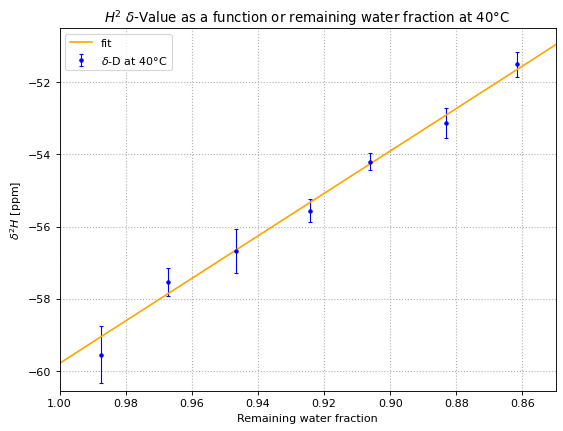

In [31]:
popt_w40_2H, pcov_w40_2H = curve_fit(rayleigh, m_W_40, water_40_delta_2H, sigma = water_40_delta_2H_sd)
x_w40_2H = np.linspace(0.85, 1, 1000)

plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(m_W_40,water_40_delta_2H, yerr = water_40_delta_2H_sd, linestyle='None', marker = ".", color = "blue", label="$\delta$-D at 40°C", capsize = 2, elinewidth=1)
plt.plot(x_w40_2H, rayleigh(x_w40_2H, *popt_w40_2H), label="fit", color = "orange")
plt.xlabel('Remaining water fraction')
plt.ylabel('$\delta^{2}H$ [ppm]')
plt.title('$H^2$ $\delta$-Value as a function or remaining water fraction at 40°C')
#plt.yscale('log')
plt.axis([1, 0.85, min(water_40_delta_2H) - 1, max(water_40_delta_2H) + 1])
plt.legend()
plt.grid(linestyle=":", linewidth=1)

print("Frac Factor:", popt_w40_2H[0], "+-", np.sqrt(pcov_w40_2H[0,0]))

Frac Factor: 3.3266641819712066 +- 0.34501477692571325


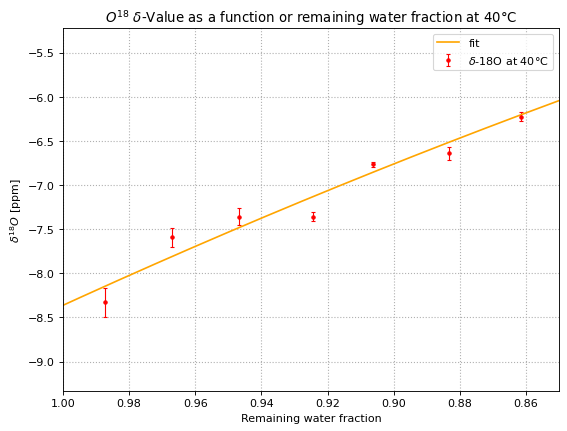

In [32]:
popt_w40_18O, pcov_w40_18O = curve_fit(rayleigh, m_W_40, water_40_delta_18O, sigma = water_40_delta_18O_sd)
x_w40_18O = np.linspace(0.85, 1, 1000)

plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(m_W_40,water_40_delta_18O, yerr = water_40_delta_18O_sd, linestyle='None', marker = ".", color = "red", label="$\delta$-18O at 40°C", capsize = 2, elinewidth=1)
plt.plot(x_w40_18O, rayleigh(x_w40_18O, *popt_w40_18O), label="fit", color = "orange")
plt.xlabel('Remaining water fraction')
plt.ylabel('$\delta^{18}O$ [ppm]')
plt.title('$O^{18}$ $\delta$-Value as a function or remaining water fraction at 40°C')
#plt.yscale('log')
plt.axis([1, 0.85, min(water_40_delta_18O) - 1, max(water_40_delta_18O) + 1])
plt.legend()
plt.grid(linestyle=":", linewidth=1)

print("Frac Factor:", popt_w40_18O[0], "+-", np.sqrt(pcov_w40_18O[0,0]))

Frac Factor: 3.9991490504712046 +- 0.3491565623320794


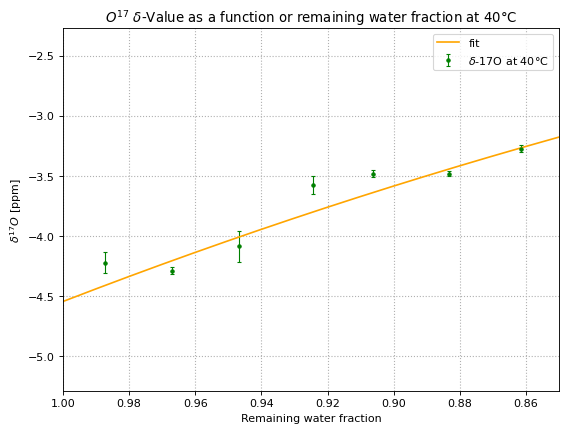

In [33]:
popt_w40_17O, pcov_w40_17O = curve_fit(rayleigh, m_W_40, water_40_delta_17O, sigma = water_40_delta_17O_sd)
x_w40_17O = np.linspace(0.85, 1, 1000)

plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(m_W_40,water_40_delta_17O, yerr = water_40_delta_17O_sd, linestyle='None', marker = ".", color = "green", label="$\delta$-17O at 40°C", capsize = 2, elinewidth=1)
plt.plot(x_w40_17O, rayleigh(x_w40_17O, *popt_w40_17O), label="fit", color = "orange")
plt.xlabel('Remaining water fraction')
plt.ylabel('$\delta^{17}O$ [ppm]')
plt.title('$O^{17}$ $\delta$-Value as a function or remaining water fraction at 40°C')
#plt.yscale('log')
plt.axis([1, 0.85, min(water_40_delta_17O) - 1, max(water_40_delta_17O) + 1])
plt.legend()
plt.grid(linestyle=":", linewidth=1)

print("Frac Factor:", popt_w40_17O[0], "+-", np.sqrt(pcov_w40_17O[0,0]))

Frac Factor: 2.127373549346578 +- 0.02310260843757077


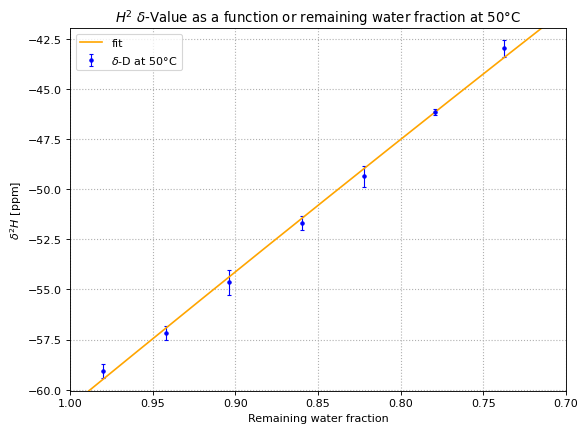

In [34]:
popt_w50_2H, pcov_w50_2H = curve_fit(rayleigh, m_W_50, water_50_delta_2H, sigma = water_50_delta_2H_sd)
x_w50_2H = np.linspace(0.7, 1, 1000)

plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(m_W_50,water_50_delta_2H, yerr = water_50_delta_2H_sd, linestyle='None', marker = ".", color = "blue", label="$\delta$-D at 50°C", capsize = 2, elinewidth=1)
plt.plot(x_w50_2H, rayleigh(x_w50_2H, *popt_w50_2H), label="fit", color = "orange")
plt.xlabel('Remaining water fraction')
plt.ylabel('$\delta^{2}H$ [ppm]')
plt.title('$H^2$ $\delta$-Value as a function or remaining water fraction at 50°C')
#plt.yscale('log')
plt.axis([1, 0.7, min(water_50_delta_2H) - 1, max(water_50_delta_2H) + 1])
plt.legend()
plt.grid(linestyle=":", linewidth=1)

print("Frac Factor:", popt_w50_2H[0], "+-", np.sqrt(pcov_w50_2H[0,0]))

Frac Factor: 4.589192157366649 +- 0.2083716634551367


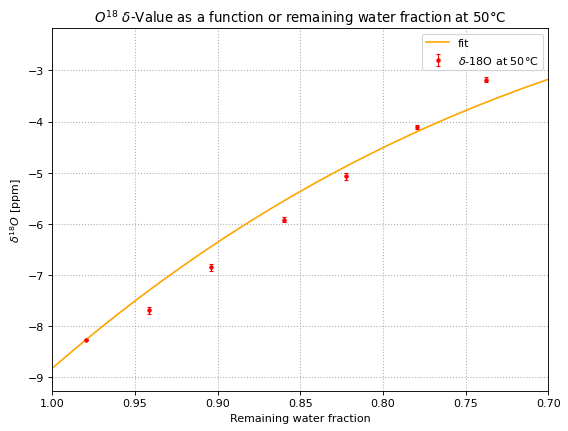

In [35]:
popt_w50_18O, pcov_w50_18O = curve_fit(rayleigh, m_W_50, water_50_delta_18O, sigma = water_50_delta_18O_sd)
x_w50_18O = np.linspace(0.7, 1, 1000)

plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(m_W_50,water_50_delta_18O, yerr = water_50_delta_18O_sd, linestyle='None', marker = ".", color = "red", label="$\delta$-18O at 50°C", capsize = 2, elinewidth=1)
plt.plot(x_w50_18O, rayleigh(x_w50_18O, *popt_w50_18O), label="fit", color = "orange")
plt.xlabel('Remaining water fraction')
plt.ylabel('$\delta^{18}O$ [ppm]')
plt.title('$O^{18}$ $\delta$-Value as a function or remaining water fraction at 50°C')
#plt.yscale('log')
plt.axis([1, 0.7, min(water_50_delta_18O) - 1, max(water_50_delta_18O) + 1])
plt.legend()
plt.grid(linestyle=":", linewidth=1)

print("Frac Factor:", popt_w50_18O[0], "+-", np.sqrt(pcov_w50_18O[0,0]))

Frac Factor: 5.645424536306669 +- 0.30069749706679644


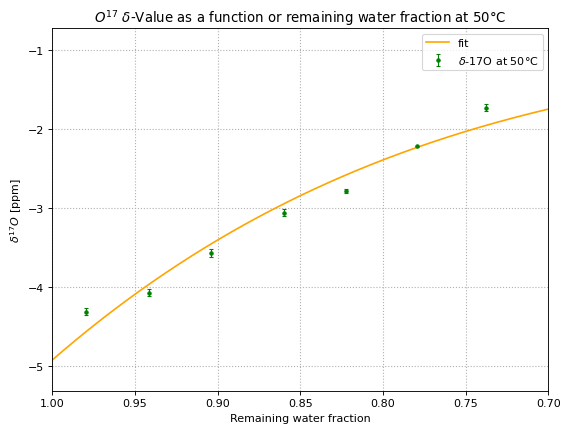

In [36]:
popt_w50_17O, pcov_w50_17O = curve_fit(rayleigh, m_W_50, water_50_delta_17O, sigma = water_50_delta_17O_sd)
x_w50_17O = np.linspace(0.7, 1, 1000)

plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(m_W_50,water_50_delta_17O, yerr = water_50_delta_17O_sd, linestyle='None', marker = ".", color = "green", label="$\delta$-17O at 50°C", capsize = 2, elinewidth=1)
plt.plot(x_w50_17O, rayleigh(x_w50_17O, *popt_w50_17O), label="fit", color = "orange")
plt.xlabel('Remaining water fraction')
plt.ylabel('$\delta^{17}O$ [ppm]')
plt.title('$O^{17}$ $\delta$-Value as a function or remaining water fraction at 50°C')
#plt.yscale('log')
plt.axis([1, 0.7, min(water_50_delta_17O) - 1, max(water_50_delta_17O) + 1])
plt.legend()
plt.grid(linestyle=":", linewidth=1)

print("Frac Factor:", popt_w50_17O[0], "+-", np.sqrt(pcov_w50_17O[0,0]))

Frac Factor: 2.2163975854615696 +- 0.05356909026465976


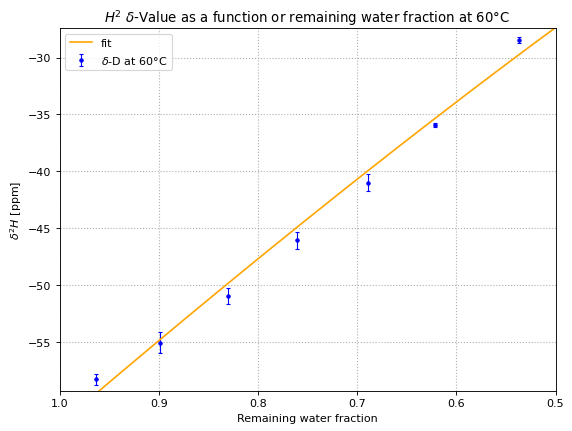

In [37]:
popt_w60_2H, pcov_w60_2H = curve_fit(rayleigh, m_W_60, water_60_delta_2H, sigma = water_60_delta_2H_sd)
x_w60_2H = np.linspace(0.5, 1, 1000)

plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(m_W_60,water_60_delta_2H, yerr = water_60_delta_2H_sd, linestyle='None', marker = ".", color = "blue", label="$\delta$-D at 60°C", capsize = 2, elinewidth=1)
plt.plot(x_w60_2H, rayleigh(x_w60_2H, *popt_w60_2H), label="fit", color = "orange")
plt.xlabel('Remaining water fraction')
plt.ylabel('$\delta^{2}H$ [ppm]')
plt.title('$H^2$ $\delta$-Value as a function or remaining water fraction at 60°C')
#plt.yscale('log')
plt.axis([1, 0.5, min(water_60_delta_2H) - 1, max(water_60_delta_2H) + 1])
plt.legend()
plt.grid(linestyle=":", linewidth=1)

print("Frac Factor:", popt_w60_2H[0], "+-", np.sqrt(pcov_w60_2H[0,0]))

Frac Factor: 8.053648634470521 +- 4.037971218747015


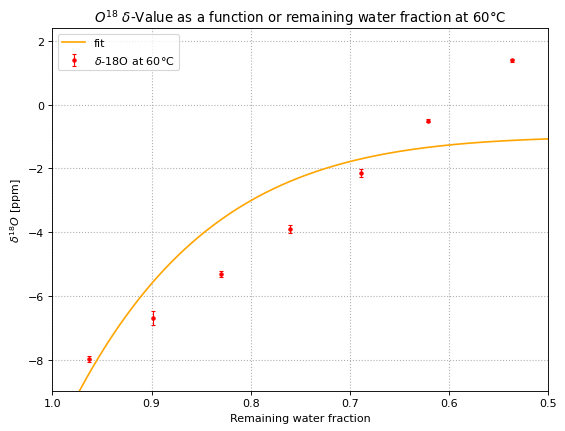

In [38]:
popt_w60_18O, pcov_w60_18O = curve_fit(rayleigh, m_W_60, water_60_delta_18O, sigma = water_60_delta_18O_sd)
x_w60_18O = np.linspace(0.5, 1, 1000)

plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(m_W_60,water_60_delta_18O, yerr = water_60_delta_18O_sd, linestyle='None', marker = ".", color = "red", label="$\delta$-18O at 60°C", capsize = 2, elinewidth=1)
plt.plot(x_w60_18O, rayleigh(x_w60_18O, *popt_w60_18O), label="fit", color = "orange")
plt.xlabel('Remaining water fraction')
plt.ylabel('$\delta^{18}O$ [ppm]')
plt.title('$O^{18}$ $\delta$-Value as a function or remaining water fraction at 60°C')
#plt.yscale('log')
plt.axis([1, 0.5, min(water_60_delta_18O) - 1, max(water_60_delta_18O) + 1])
plt.legend()
plt.grid(linestyle=":", linewidth=1)

print("Frac Factor:", popt_w60_18O[0], "+-", np.sqrt(pcov_w60_18O[0,0]))

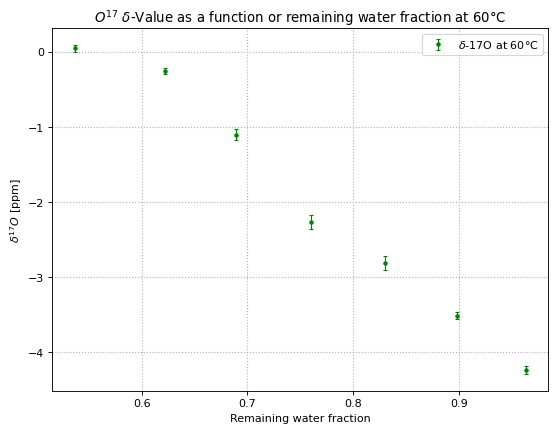

In [39]:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(m_W_60,water_60_delta_17O, yerr = water_60_delta_17O_sd, linestyle='None', marker = ".", color = "green", label="$\delta$-17O at 60°C", capsize = 2, elinewidth=1)
plt.xlabel('Remaining water fraction')
plt.ylabel('$\delta^{17}O$ [ppm]')
plt.title('$O^{17}$ $\delta$-Value as a function or remaining water fraction at 60°C')
#plt.yscale('log')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

In [40]:
# Water lines:
def linear(x, a, b):
    return a*x + b

Water Line slope 40°C:  3.8900228058068267 +- 0.37229639804108494
Deviation:  11.039529836492306


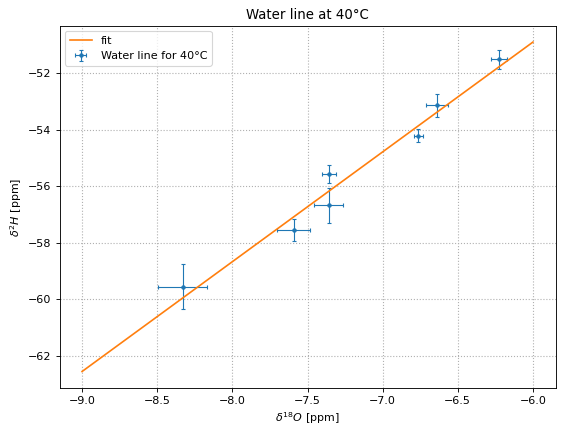

In [41]:
popt_wl40, pcov_wl40 = curve_fit(linear, water_40_delta_18O, water_40_delta_2H, sigma = water_40_delta_2H_sd)
x_wl40 = np.linspace(-9, -6, 1000)

plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(water_40_delta_18O, water_40_delta_2H, xerr = water_40_delta_18O_sd, yerr = water_40_delta_2H_sd, linestyle='None', marker = ".", label="Water line for 40°C", capsize = 2, elinewidth=1)
plt.plot(x_wl40, linear(x_wl40, *popt_wl40), label="fit")
plt.xlabel('$\delta^{18}O$ [ppm]')
plt.ylabel('$\delta^{2}H$ [ppm]')
plt.title('Water line at 40°C')
#plt.yscale('log')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

# Deviation from water line slope
wl_slope_lit = 8
sigma_wl40 = np.abs((wl_slope_lit - popt_wl40[0])/np.sqrt(pcov_wl40[0,0]))

print("Water Line slope 40°C: ", popt_wl40[0], "+-", np.sqrt(pcov_wl40[0,0]))
print("Deviation: ", sigma_wl40)

Water Line slope 50°C:  3.1047698499275747 +- 0.02642720324387294
Deviation:  185.23451403081665


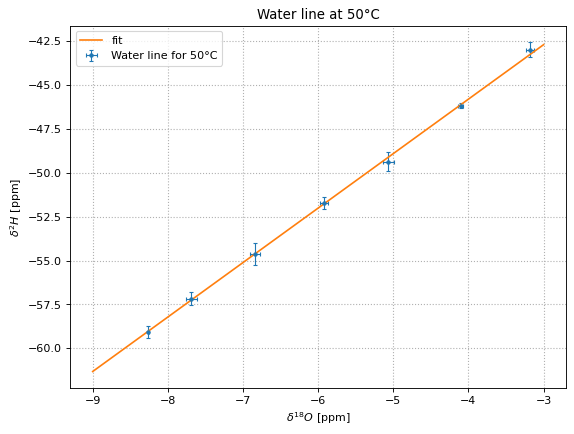

In [42]:
popt_wl50, pcov_wl50 = curve_fit(linear, water_50_delta_18O, water_50_delta_2H, sigma = water_50_delta_2H_sd)
x_wl50 = np.linspace(-9, -3, 1000)

plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(water_50_delta_18O, water_50_delta_2H, xerr = water_50_delta_18O_sd, yerr = water_50_delta_2H_sd, linestyle='None', marker = ".", label="Water line for 50°C", capsize = 2, elinewidth=1)
plt.plot(x_wl50, linear(x_wl50, *popt_wl50), label="fit")
plt.xlabel('$\delta^{18}O$ [ppm]')
plt.ylabel('$\delta^{2}H$ [ppm]')
plt.title('Water line at 50°C')
#plt.yscale('log')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

wl_slope_lit = 8
sigma_wl50 = np.abs((wl_slope_lit - popt_wl50[0])/np.sqrt(pcov_wl50[0,0]))

print("Water Line slope 50°C: ", popt_wl50[0], "+-", np.sqrt(pcov_wl50[0,0]))
print("Deviation: ", sigma_wl50)

Water Line slope 60°C:  3.1827920732939643 +- 0.10915956583305386
Deviation:  44.12996598093257


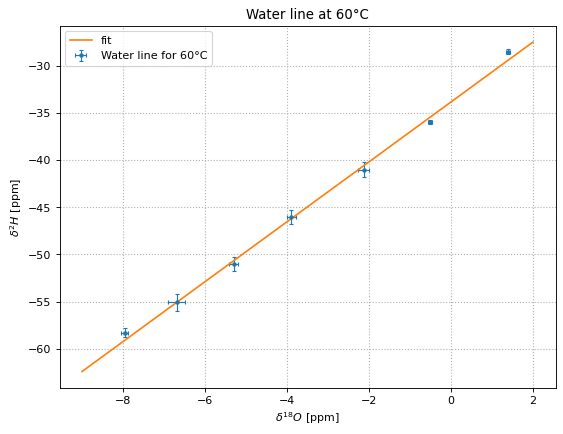

In [43]:
popt_wl60, pcov_wl60 = curve_fit(linear, water_60_delta_18O, water_60_delta_2H, sigma = water_60_delta_2H_sd)
x_wl60 = np.linspace(-9, 2, 1000)

plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(water_60_delta_18O, water_60_delta_2H, xerr = water_60_delta_18O_sd, yerr = water_60_delta_2H_sd, linestyle='None', marker = ".", label="Water line for 60°C", capsize = 2, elinewidth=1)
plt.plot(x_wl60, linear(x_wl60, *popt_wl60), label="fit")
plt.xlabel('$\delta^{18}O$ [ppm]')
plt.ylabel('$\delta^{2}H$ [ppm]')
plt.title('Water line at 60°C')
#plt.yscale('log')
plt.legend()
plt.grid(linestyle=":", linewidth=1)

wl_slope_lit = 8
sigma_wl60 = np.abs((wl_slope_lit - popt_wl60[0])/np.sqrt(pcov_wl60[0,0]))

print("Water Line slope 60°C: ", popt_wl60[0], "+-", np.sqrt(pcov_wl60[0,0]))
print("Deviation: ", sigma_wl60)

In [44]:
# TODO: alpha factors

# 6.4 Finding the source of unknown samples

In [45]:
# Once again print the final measured values:


for i in range(unknown_samples_list.size):
    print(unknown_samples_list[i], ":")
    print("d2H = ", unknown_samples_delta_2H[i], "+-", unknown_samples_delta_2H_sd[i])
    print("d18O = ", unknown_samples_delta_18O[i], "+-", unknown_samples_delta_18O_sd[i])
    print("d17O = ", unknown_samples_delta_17O[i], "+-", unknown_samples_delta_17O_sd[i])

W017 :
d2H =  -67.341215 +- 0.44376378023260304
d18O =  -9.7936065 +- 0.06323187243094122
d17O =  -5.1209415 +- 0.05018128071977688
W070 :
d2H =  -29.952336 +- 0.6395154
d18O =  -5.322863 +- 0.119458
d17O =  -2.659701 +- 0.02975414
W071 :
d2H =  -31.00985 +- 0.40947886874349204
d18O =  -5.5768015 +- 0.051025164580932515
d17O =  -2.8248485 +- 0.06205312973510765
K001 :
d2H =  -38.061883 +- 0.26001882000059634
d18O =  -6.8601035 +- 0.029549800117781258
d17O =  -3.47078 +- 0.04356654462328433
K007 :
d2H =  -41.6421785 +- 0.4182432619259903
d18O =  -4.734077 +- 0.05635897782102865
d17O =  -2.480701 +- 0.05061391757526407


In [46]:
# Analysis: which samples could be which
# W017 could be Puslinch (-67.484, -9.839, -5.231)
# or could be Bad Liebenwerda (-66.746, -9.803, -5.159)
# or could be Wiesenburg (-66.302, 9.467, -5.178)
# or maybe could be Xi'an (-68.321, -10.208, -5.405)
# or could be Marianskych (-67.841, -9.408, -5.241)
# tending towards Bad Liebenwerda

# W070 could be Roxane, Benton (-32.132. -5.491, -3)
# or could be Serra do Buaco (-27.959, -5.125, -2.7)
# or could be Serra do Geras (-30.636, -5.456, -2.897)
# or could be Serra de Sao Mamede (-31.654, -5.649, -3.032)
# or could be Merida (-29.546, -5.009, -2.664) # but is european
# so maybe Serra do Geras? but that's W071

# W071 could be similar to W070
# tending towards Serra do Geras

# K001 is non-european
# K001 could be Crete (-37.961, -7.193, -3.798)
# or could be Julatten (-37.655, -6.393, -3.465)
# or could be Dubrovnik (-39.59, -6.689, -3.701)
# is non-european so probably Julatten

# K007 could be Katzenbuckel (-41.715, -4.665, -2.506)

# General trends:
# futher from coast -> lighter, continental effect, has travelled longer distance
# --> more of the heavier isotopes have been carried away by rain

# higher altitude --> lighter, because colder

# 6.3 Local Rainwater Samples

In [48]:
fileloc_rw_individual = os.path.join(dirname, 'Rainwater_Samples_Individual.csv')
fileloc_rw_means = os.path.join(dirname, 'Rainwater_Samples_Means.csv')

df_rw_individual = pd.read_csv(fileloc_rw_individual, delimiter=";", nrows=385)
df_rw_means = pd.read_csv(fileloc_rw_means, delimiter=";", nrows=70)

rw_individual_probe_id = df_rw_individual['Probennummer']
rw_means_probe_id = df_rw_means["Sample Name"]
print(rw_individual_probe_id)

# Rainwater samples timeframes:
# 641: 18.-21.11.2022
# 603: 29.4. - 3.5.2022
# 105: 4.10. - 2.11.2022
# 102: 29.6. - 2.8.2022

for i in range(rainwater_samples_list.size):
    print(rainwater_samples_list[i], ":")
    print("d2H = ", rainwater_samples_delta_2H[i], "+-", rainwater_samples_delta_2H_sd[i])
    print("d18O = ", rainwater_samples_delta_18O[i], "+-", rainwater_samples_delta_18O_sd[i])
    print("d17O = ", rainwater_samples_delta_17O[i], "+-", rainwater_samples_delta_17O_sd[i])

0      114
1      115
2      116
3      117
4      118
      ... 
380    607
381    608
382    609
383    610
384    611
Name: Probennummer, Length: 385, dtype: int64
603 :
d2H =  -34.908656 +- 0.6063177
d18O =  -6.126761 +- 0.04405666
d17O =  -3.455611 +- 0.05764392
641 :
d2H =  -64.871163 +- 0.116136
d18O =  -9.956885 +- 0.06547036
d17O =  -4.930588 +- 0.05465004
102 :
d2H =  -22.150757 +- 0.510213
d18O =  -3.951111 +- 0.05218687
d17O =  -2.670707 +- 0.04835266
105 :
d2H =  -31.2348875 +- 0.3782976374263425
d18O =  -5.487845999999999 +- 0.04109958953594366
d17O =  -3.1383210000000004 +- 0.05468136656626003
